# 4. EDA

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [58]:
print(os.getcwd())
os.chdir('/Users/joanaritalopes/Desktop/Money-Laundering-Detection')

/Users/joanaritalopes/Desktop/Money-Laundering-Detection


In [59]:
df_merged = pd.read_csv('data/processed/df_merged.csv')

In [60]:
df_merged['From Bank'] = df_merged['From Bank'].astype(str)
df_merged['To Bank'] = df_merged['To Bank'].astype(str)

In [61]:
def basic_checks(df):
    print('--------Info--------')
    print(df.info())
    print('--------Duplicates--------')
    print(df.loc[df.duplicated()])
    print('--------Unique values in categorical variables--------')
    for col in df.select_dtypes(include='object'):
        print(col, df[col].nunique())

basic_checks(df_merged)

--------Info--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12240940 entries, 0 to 12240939
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           object 
 2   Account Number      object 
 3   To Bank             object 
 4   Amount Received     float64
 5   Receiving Currency  object 
 6   Amount Paid         float64
 7   Payment Currency    object 
 8   Payment Format      object 
 9   Is Laundering       int64  
 10  Bank Name           object 
 11  Entity ID           object 
 12  Entity Name         object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ GB
None
--------Duplicates--------
                    Timestamp From Bank Account Number To Bank  \
883496    2022-09-01 16:20:00     12004      800c927c0   12004   
883497    2022-09-01 16:20:00     12004      813d8c1e1     220   
3770178   2022-09-07 21:25:00     29992      813725ae1     220   
4264107   

In [62]:
df_merged.head()

,Timestamp,From Bank,Account Number,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Bank Name,Entity ID,Entity Name
0,2022-09-01 00:20:00,10,8000ebd30,10,3697.34,us dollar,3697.34,us dollar,reinvestment,0,national bank of laramie,800d232d0,partnership #1
1,2022-09-01 00:20:00,3208,8000f5340,1,0.01,us dollar,0.01,us dollar,cheque,0,arbor savings bank,800aa5d20,corporation #1
2,2022-09-01 00:00:00,3209,8000f4670,3209,14675.57,us dollar,14675.57,us dollar,reinvestment,0,national bank of fort wayne,800fbb3a0,partnership #3
3,2022-09-01 00:02:00,12,8000f5030,12,2806.97,us dollar,2806.97,us dollar,reinvestment,0,national bank of the east,800c0ef20,sole proprietorship #1
4,2022-09-01 00:06:00,10,8000f5200,10,36682.97,us dollar,36682.97,us dollar,reinvestment,0,national bank of laramie,800c3ec10,partnership #4


In [63]:
categorical_data = df_merged.drop(columns=df_merged.select_dtypes(include=["int64", "float64"]).columns)
categorical_data.describe(include='object').T

,count,unique,top,freq
Timestamp,12240940,15133,2022-09-01 00:22:00,26572
From Bank,12240940,57222,70,1081591
Account Number,12240940,988911,10042b660,1553
To Bank,12240940,33608,11,81184
Receiving Currency,12240940,15,us dollar,4505900
Payment Currency,12240940,15,us dollar,4539364
Payment Format,12240940,7,cheque,4458178
Bank Name,12240940,20859,first bank of danbury,88276
Entity ID,12240940,361845,8015b10d0,111616
Entity Name,12240940,223926,partnership #953,111689


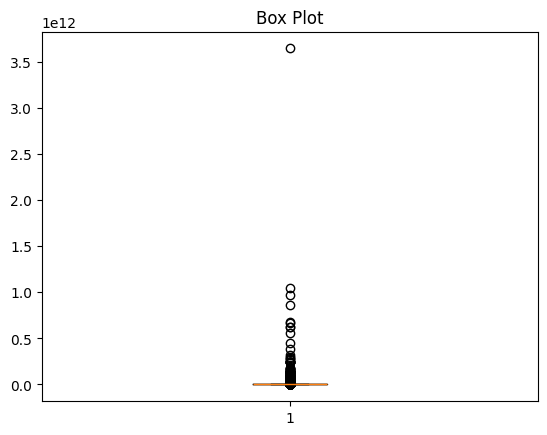

In [64]:
# Detect outliers in the transaction amount -> given that I am trying to detect for fraudulent spikes, suspicious account activity, unusual transaction,
# and those outliers might be a sign of thay, will not remove them. such patterns might be useful to train the models

def make_boxplot(df, col):
    plt.boxplot(df[col])
    plt.title('Box Plot')
    plt.show()


make_boxplot(df_merged, 'Amount Paid')

In [65]:
numerical_data = df_merged.drop(columns=df_merged.select_dtypes(include=["object", "datetime"]).columns)

numerical_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Amount Received,12240940.0,6.126813e+06,1.718946e+09,0.000001,179.3,1409.14,12368.4725,3.644854e+12
Amount Paid,12240940.0,4.562318e+06,1.289584e+09,0.000001,180.5,1411.69,12301.0800,3.644854e+12
Is Laundering,12240940.0,7.267416e-04,2.694835e-02,0.000000,0.0,0.00,0.0000,1.000000e+00


In [80]:
print(numerical_data.var())
print('-----------------------')
print(numerical_data.skew())

Amount Received        2.954774e+18
Amount Paid            1.663026e+18
Is Laundering          7.262135e-04
Amount Received Log    1.172656e+01
Amount Paid Log        1.161473e+01
dtype: float64
-----------------------
Amount Received        1645.021368
Amount Paid            2013.687511
Is Laundering            37.054096
Amount Received Log       0.301509
Amount Paid Log           0.287369
dtype: float64


Amount Received    1645.021368
Amount Paid        2013.687511
Is Laundering        37.054096
dtype: float64

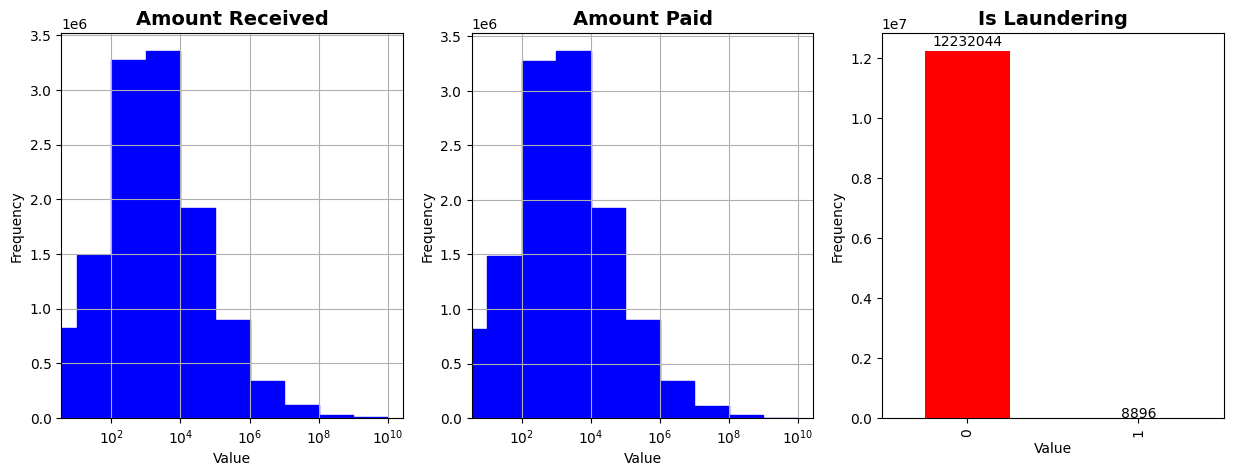

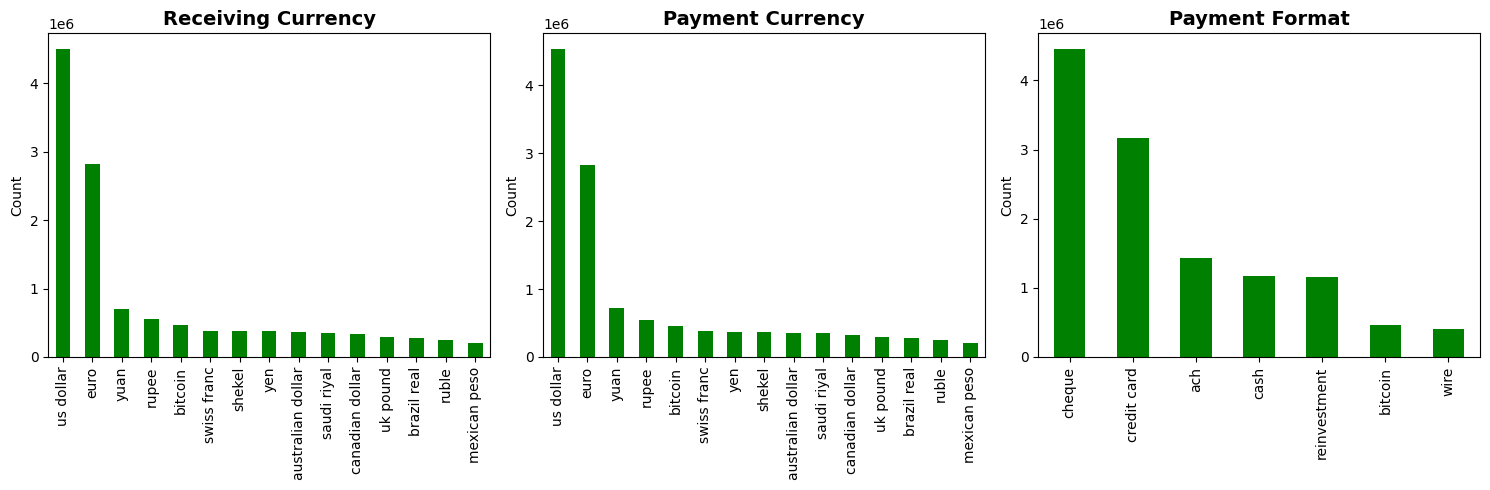

In [ ]:
import matplotlib.pyplot as plt

# NUMERICAL
# Define custom bins (edges)
bins = [0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]
cols = numerical_data.columns
fig, axes = plt.subplots(1, len(cols), figsize=(5*len(cols), 5))

for ax, col in zip(axes, cols):
    if numerical_data[col].nunique() <= 2:  # binary
        counts = numerical_data[col].value_counts()
        counts.plot(kind='bar', ax=ax, color='red')
        # Add count labels on top of each bar
        for idx, val in enumerate(counts):
            ax.text(idx, 1.015*val, str(val), ha='center', fontsize=10)
    else:
        numerical_data[col].hist(bins=bins, ax=ax, color='blue', edgecolor='blue')
        ax.set_xscale('log')  # optional log scale for readability
    ax.set_title(col, fontsize=14, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# CATEGORICAL
cols = ['Receiving Currency', 'Payment Currency', 'Payment Format']
fig, axes = plt.subplots(1, len(cols), figsize=(5*len(cols), 5))  # width scales with number of plots

for ax, col in zip(axes, cols):
    counts = categorical_data[col].value_counts()
    counts.plot(kind='bar', rot=90, ax=ax, color='green')
    ax.set_title(col, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count')


plt.tight_layout()
plt.show()

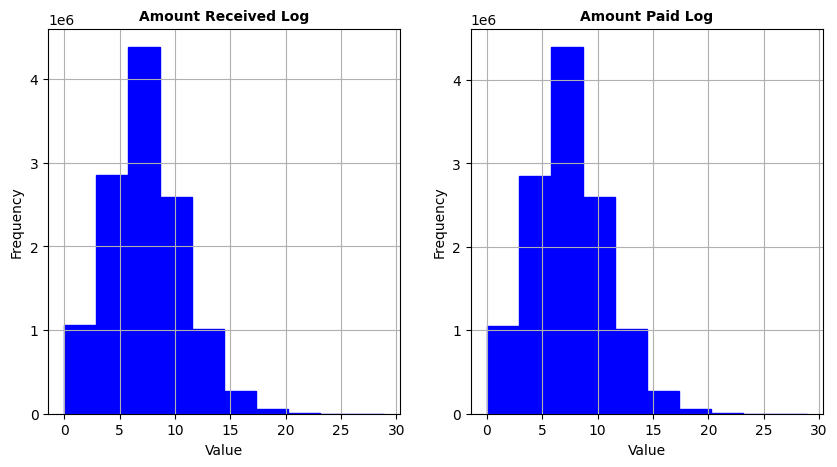

In [76]:
import numpy as np
import matplotlib.pyplot as plt

#  has there very high positive skew ranges (typical in financial data) - we do a log transformation
numerical_data['Amount Received Log'] = np.log1p(numerical_data['Amount Received'])  # log(1 + x) to handle zeros
numerical_data['Amount Paid Log'] = np.log1p(numerical_data['Amount Paid'])  # log(1 + x) to handle zeros
numerical_data_logs = numerical_data[['Amount Received Log','Amount Paid Log']]
numerical_data_logs.skew()


cols = numerical_data_logs.columns
fig, axes = plt.subplots(1, len(cols), figsize=(5*len(cols), 5))

for ax, col in zip(axes, cols):
    numerical_data_logs[col].hist(ax=ax, color='blue', edgecolor='blue')
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

In [ ]:
# Variables Distribution

# Numerical: both right-skewed -> most transactions are relatively small, but there are a few extremely large transactions causing the long right tail.
# Binary: imbalanced
# Categorical: skewed category distribution(a few tall bars with many tiny bars)

<Axes: >

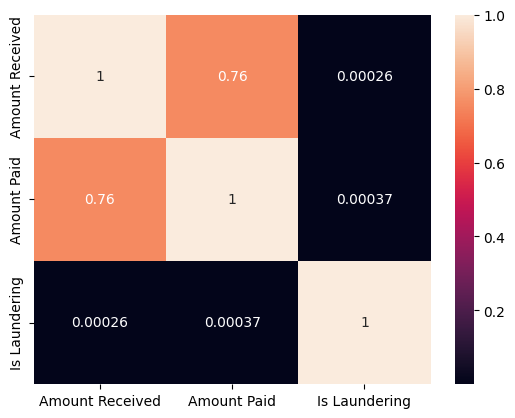

In [70]:
import seaborn as sb

# pearson (linear relationship between vars - assumes normal distribution, sensitive to outliers)
# spearman (for vars with a natural order, can rank them, monotonic relationship - good for ordinal relationships, robust outliers)
# kendall (small samples)

corr = numerical_data.corr(method='pearson')
sb.heatmap(corr, annot=True)